![](http://pic1.tsingdataedu.com/%E9%87%8F%E5%8C%96banner.jpg)

# 二叉树模型
####  [稀牛学院 x 网易云课程]《AI量化交易》 by @Frank

我们先看一种教科书版本的二叉树模型。这里首先初始化变量名

In [4]:
import numpy as np

S0 = 100    # initial stock level
T = 1.0     # time to maturity
r = 0.05    # risk free rate
vol = 0.20  # volatility
M = 3    # time stpes
dt = T/M    # length of time interval
df = np.exp(-r*dt) 
u = np.exp(vol*np.sqrt(dt))
d = 1/u
    
optype='P'
extype='E'
strike=100
   

这里我们生成了the binomial tree.

In [5]:
# generate tree
S = np.zeros((M+1,M+1), dtype=np.float64)
S[0,0] = S0
for j in range(1, M+1, 1):
    for i in range(j+1):
        S[i,j] = S[0,0]*u**(j-2*i)
print(S)


[[100.         112.24009024 125.97837858 141.39824581]
 [  0.          89.09472523 100.         112.24009024]
 [  0.           0.          79.37870064  89.09472523]
 [  0.           0.           0.          70.72223522]]


In [6]:
    # calculte intrinsic value
    iv = np.zeros((M+1,M+1), dtype=np.float64)
    for j in range(M+1):
        for i in range(j+1):
            if optype=='C':
                iv[i,j] = max(S[i,j]-strike, 0)
            else:
               iv[i,j] = max(strike-S[i,j], 0)
           
    # valuation
    pv = np.zeros((M+1,M+1), dtype=np.float64)
    pv[:,M] = iv[:,M]
    q = (np.exp(r*dt) - d) / (u - d)
    for j in range(M-1, -1, -1):
        for i in range(j+1):
            pv[i,j] = (q*pv[i,j+1]+(1-q)*pv[i+1,j+1])*df
            if extype=='E':
                pv[i,j] = pv[i,j]
            else: 
                pv[i,j] = max(pv[i,j], iv[i,j])
    print(pv[0,0])


6.166813542022532


上面就是一个欧式看涨期权的二叉树模型，虽然公式有些烦，但编程并不复杂。这样的程序修改起来很麻烦。我们应该把它写成函数的形式。

In [7]:
import numpy as np
def binomial(strike, M, optype, extype):
    # optype 'C' = call, 'P' = put
    # extype 'E' = european, 'A' = american 
    # M is time steps
    
    # set model paramters
    S0 = 100    # initial stock level
    T = 1.0     # time to maturity
    r = 0.05    # risk free rate
    vol = 0.20  # volatility
    dt = T/M    # length of time interval
    df = np.exp(-r*dt) 
    u = np.exp(vol*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u - d)
   
    # generate tree
    S = np.zeros((M+1,M+1), dtype=np.float64)
    S[0,0] = S0
    for j in range(1, M+1, 1):
        for i in range(j+1):
            S[i,j] = S[0,0]*u**(j-2*i)
    #print(S)
    # calculte intrinsic value
    iv = np.zeros((M+1,M+1), dtype=np.float64)
    for j in range(M+1):
        for i in range(j+1):
            if optype=='C':
                iv[i,j] = max(S[i,j]-strike, 0)
            else:
               iv[i,j] = max(strike-S[i,j], 0)
           
    # valuation
    pv = np.zeros((M+1,M+1), dtype=np.float64)
    pv[:,M] = iv[:,M]
    for j in range(M-1, -1, -1):
        for i in range(j+1):
            pv[i,j] = (q*pv[i,j+1]+(1-q)*pv[i+1,j+1])*df
            if extype=='E':
                pv[i,j] = pv[i,j]
            else:
                pv[i,j] = max(pv[i,j], iv[i,j])
           
    return pv[0,0]
print(binomial(100, 500, optype='P', extype='E'))
print(binomial(100, 1000, optype='P', extype='E'))

5.569527586516085
5.571526553833351


但现实中，一个模型必定存在于一个广泛的库里。这个模型可能使用了很多其他的工具，你的工作也将会被很多其他人使用。所以，我们需要面向对象class的编程。非常庞大的问题，只能由面向对象编程来实现。每一个对象被封装起来，不能被改动，别人可以在不完全理解你程序细节的情况下，基于你的工作，进行拓展。

这里我们首先设计了一个class，它从yahoo网站下载数据。

/opt/conda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[*********************100%***********************]  1 of 1 downloaded
Date
2016-01-05   -0.025379
2016-01-06   -0.019764
2016-01-07   -0.043121
2016-01-08    0.005274
2016-01-11    0.016062
2016-01-12    0.014409
2016-01-13   -0.026046
2016-01-14    0.021635
2016-01-15   -0.024308
2016-01-19   -0.004851
2016-01-20    0.001344
2016-01-21   -0.005075
2016-01-22    0.051802
2016-01-25   -0.019716
2016-01-26    0.005516
2016-01-27   -0.067965
2016-01-28    0.007146
2016-01-29    0.033958
2016-02-01   -0.009393
2016-02-02   -0.020429
2016-02-03    0.019599
2016-02-04    0.008003
2016-02-05   -0.027071
2016-02-08    0.010475
2016-02-09   -0.000210
2016-02-10   -0.007609
2016-02-11   -0.006065
2016-02-12    0.003090
2016-02-16    0.027804
2016-02-17    0.015199
2016-02-18   -0.019138
2016-02-19   -0.002288
2016-02-22    0.008708
2016-02-23   -0.022864
2016-02-24    0.014781
2016-02-25    0.006844
2016-02-26    0.001549
2016-02-29   -0.002273
Name: log, dtype: float64


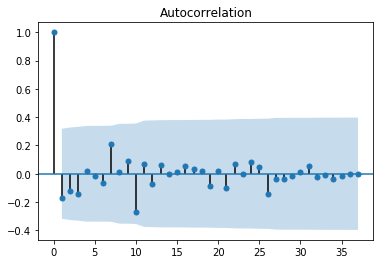

In [8]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import arch
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
yf.pdr_override()


class stock_vol:

    def __init__(self, tk, start, end):
        self.tk = tk
        self.start = start
        self.end = end
        all_data = pdr.get_data_yahoo(self.tk, start=self.start, end=self.end)
        self.stock_data = pd.DataFrame(all_data['Adj Close'], columns=["Adj Close"])
        self.stock_data["log"] = np.log(self.stock_data)-np.log(self.stock_data.shift(1))

    def mean_sigma(self):
        st = self.stock_data["log"].dropna().ewm(span=252).std()
        sigma = st.iloc[-1]
        return sigma

    def garch_sigma(self):
        model = arch.arch_model(self.stock_data["log"].dropna(), mean='Zero', vol='GARCH', p=1, q=1)
        model_fit = model.fit()
        forecast = model_fit.forecast(horizon=1)
        var = forecast.variance.iloc[-1]
        sigma = float(np.sqrt(var))
        return sigma


if __name__ == "__main__":
    vol = stock_vol("AAPL", start="2016-01-01", end="2016-03-01")
    test = vol.stock_data["log"].dropna()
    print(test)
    fig = plot_acf(test)
    plt.show()


下面有一个宽泛的class，这是一个股票期权class。里面描述了一个普通的股票期权具备的特征，我们的工作，可以基于这个class发展起来。

In [1]:
import math
#from stock_volatility import stock_vol


class stockoption():

    def __init__(self, S0, K, r, T, N, prm):
        """
        Initialise parameters
        :param S0: initial stock price
        :param K: strike price
        :param r: risk free interest rate per year
        :param T: length of option in years
        :param N: number of binomial iterations
        :param prm: dictionary with additional parameters
        """
        self.S0 = S0
        self.K = K
        self.r = r
        self.T = T
        self.N = N
        """
        prm parameters:
        start = date from when you want to analyse stocks, "yyyy-mm-dd"
        end = date of final stock analysis (likely current date), "yyyy-mm-dd"
        tk = ticker label
        div = dividend paid
        is_calc = is volatility calculated using stock price history, boolean
        use_garch = use GARCH model, boolean
        sigma = volatility of stock
        is_call = is it a call option, boolean
        eu_option = European or American option, boolean
        """
        self.tk = prm.get('tk', None)
        self.start = prm.get('start', None)
        self.end = prm.get('end', None)
        self.div = prm.get('div', 0)
        self.is_calc = prm.get('is_calc', False)
        self.use_garch = prm.get('use_garch', False)
        self.vol = stock_vol(self.tk, self.start, self.end)
        if self.is_calc:
            if self.use_garch:
                self.sigma = self.vol.garch_sigma()
            else:
                self.sigma = self.vol.mean_sigma()
        else:
            self.sigma = prm.get('sigma', 0)
        self.is_call = prm.get('is_call', True)
        self.eu_option = prm.get('eu_option', True)
        '''
        derived values:
        dt = time per step, in years
        df = discount factor
        '''
        self.dt = T/float(N)
        self.df = math.exp(-(r-self.div)*self.dt)


下面我们定义一个二叉树期权模型，这个模型有一个重要的函数叫做price。

In [2]:
import numpy as np
#from stock_option import stockoption
import math


class binomial_option(stockoption):
    '''
    calculate required preliminary parameters:
    u = factor change of upstate
    d = factor change of downstate
    qu = risk free upstate probability
    qd = risk free downstate probability
    M = number of nodes
    '''
    def __int_prms__(self):
        self.M = self.N + 1 
        self.u = math.exp(self.sigma*math.sqrt(self.dt))
        self.d = 1./self.u
        self.qu = (math.exp((self.r-self.div)*self.dt)-self.d)/(self.u-self.d)
        self.qd = 1-self.qu
        
    def stocktree(self):
        stocktree = np.zeros([self.M, self.M])
        for i in range(self.M):
            for j in range(self.M):
                stocktree[j, i] = self.S0*(self.u**(i-j))*(self.d**j)
        return stocktree

    def option_price(self, stocktree):
        option = np.zeros([self.M, self.M])
        if self.is_call:
            option[:, self.M-1] = np.maximum(np.zeros(self.M), (stocktree[:, self.N] - self.K))
        else:
            option[:, self.M-1] = np.maximum(np.zeros(self.M), (self.K - stocktree[:, self.N]))
        return option

    def optpricetree(self, option):
        for i in np.arange(self.M-2, -1, -1):
            for j in range(0, i+1):
                option[j, i] = math.exp(-self.r*self.dt) * (self.qu*option[j, i+1]+self.qd*option[j+1, i+1])
        return option

    def begin_tree(self):
        stocktree = self.stocktree()
        payoff = self.option_price(stocktree)
        return self.optpricetree(payoff)

    def price(self):
        self.__int_prms__()
        self.stocktree()
        payoff = self.begin_tree()
        return payoff[0, 0]


In [11]:
#from eu_option import euro_option

option_eu = binomial_option(217.58, 215, 0.05, 0.1, 40, {'tk': 'AAPL', 'is_calc': True, 'start': '2017-12-18',
                                                     'end': '2018-12-18', 'eu_option':False})
#option_eu2 = euro_option(217.58, 215, 0.05, 0.1, 40, {'tk': 'AAPL', 'is_calc': True, 'use_garch': True, 'start': '2017-12-18',
#                                                     'end': '2018-12-18', 'eu_option':False})

print(option_eu.price())
#print(option_eu2.price())


[*********************100%***********************]  1 of 1 downloaded
3.653287251890409


### 版权归 © 稀牛学院 所有 保留所有权利
![](http://pic1.tsingdataedu.com/%E7%A8%80%E7%89%9B%20x%20%E7%BD%91%E6%98%93.png)